# Лабораторная работа №2

Задания:
- Выберите временной ряд с ценами актива (предпочтительно с явной сезонностью, например, акции компании с сезонным бизнесом).

- Проведите декомпозицию временного ряда на тренд, сезонность и остаток. Визуализируйте компоненты декомпозиции.

- Проанализируйте сезонность: определите периодичность и амплитуду сезонных колебаний.

- Удалите сезонность из ряда и сравните исходный ряд с десезонализированным.

- Постройте прогноз на основе выявленных тренда и сезонности на 12 периодов вперед. Оцените качество прогноза, используя метрики MAE и RMSE. Сделайте выводы о влиянии сезонности на цены актива и эффективности прогнозирования.

- Проведите тест на стационарность ряда (тест Дики-Фуллера). Если ряд нестационарен, приведите его к стационарному виду.

- Постройте и сравните модели AR, MA, ARMA и ARIMA. Подберите оптимальные параметры для каждой модели, используя информационные критерии (AIC, BIC).

- Проведите диагностику остатков моделей. Сделайте прогноз на 30 дней вперед для каждой модели. Сравните качество прогнозов моделей, используя метрики MAE, RMSE и MAPE. Визуализируйте результаты прогнозирования. Сделайте выводы о применимости различных авторегрессионных моделей к ценам криптовалют.

# Подключение глобально необходимых библиотек

In [19]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Загрузка датасета

In [20]:
file_path = "aapl_us_2025.csv" 
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1984-09-07,0.099824,0.101049,0.098619,0.099824,9.859472e+07
1984-09-10,0.099824,0.100130,0.097424,0.099232,7.652559e+07
1984-09-11,0.100130,0.102846,0.100130,0.101049,1.804519e+08
1984-09-12,0.101049,0.101641,0.098007,0.098007,1.576401e+08
1984-09-13,0.103460,0.103754,0.103460,0.103460,2.455186e+08


# Декомпозиция временного ряда

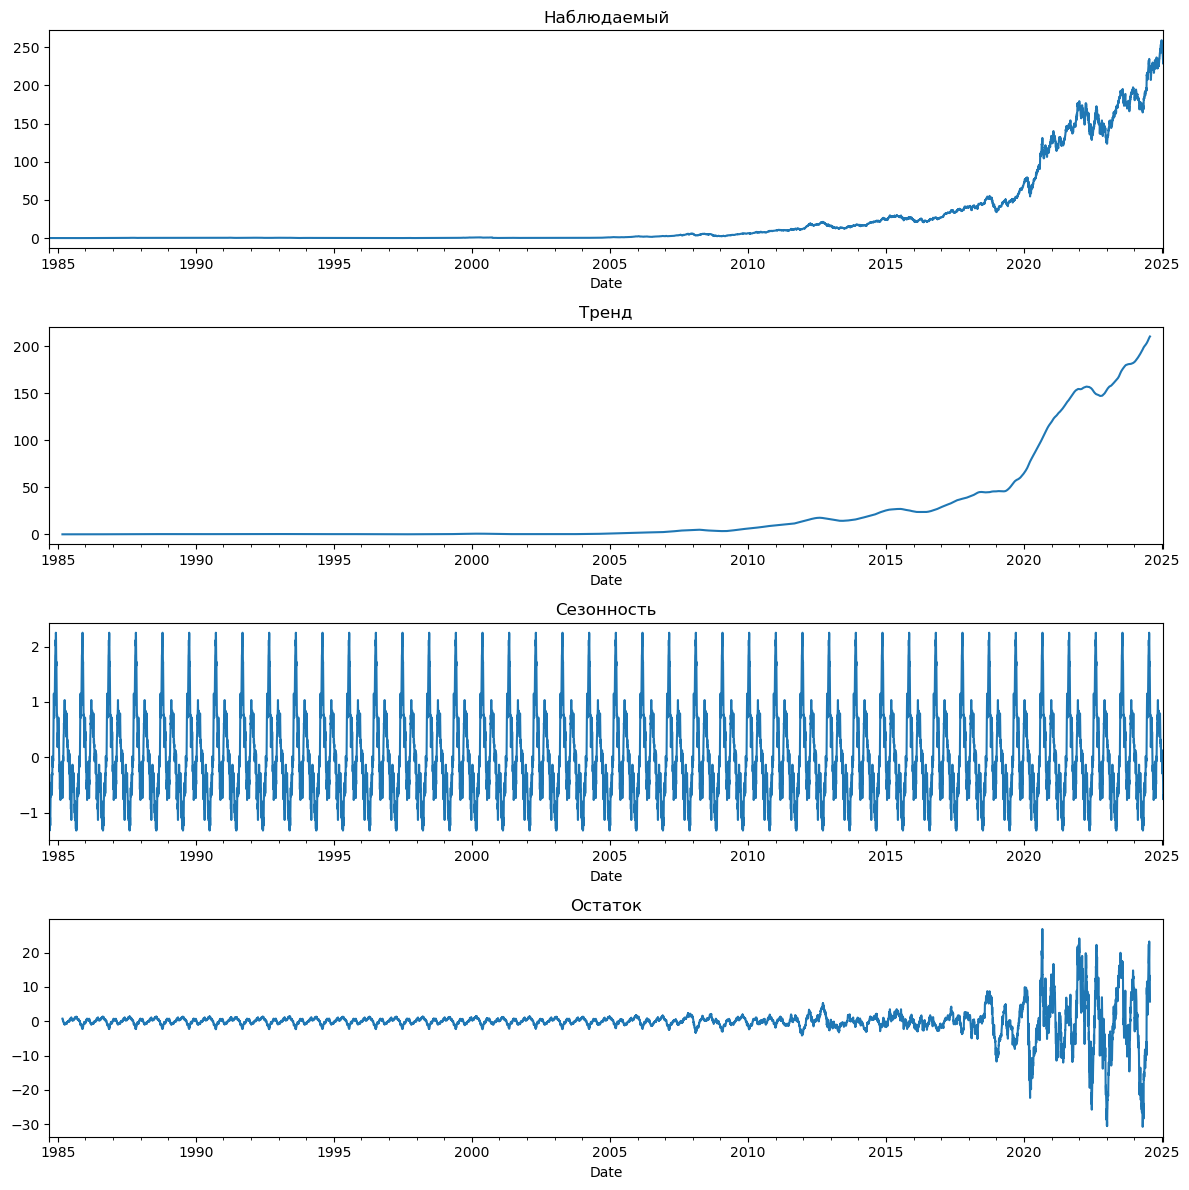

In [28]:
decomposition = seasonal_decompose(df['Close'], model='additive', period=252)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Наблюдаемый')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Тренд')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Сезонность')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Остаток')
plt.tight_layout()
plt.show()

Наблюдаемый ряд показывает общую тенденцию с колебаниями. До 2023 года цены остаются относительно стабильными, затем начинается постепенный рост. В 2024–2025 годах динамика становится более активной, с чередованием периодов роста и коррекций.

Тренд демонстрирует умеренный рост после 2023 года, что может указывать на восходящее движение стоимости акций. До этого момента наблюдается период относительной стабильности, где изменения тренда не столь значительны.

Сезонность выражена достаточно чётко и повторяется с периодом в один год. В течение года:
В конце года цены достигают пиковых значений (примерно +10).
В начале следующего года наблюдается спад (примерно до -10).

Остатки показывают усиление волатильности после 2020 года, что может быть связано с ростом рыночной неопределённости. До 2015 года колебания были менее выраженными, но после 2020 года резкие изменения в остатках становятся более частыми и сильными.

# Прогнозирование с учётом тренда и сезонности

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


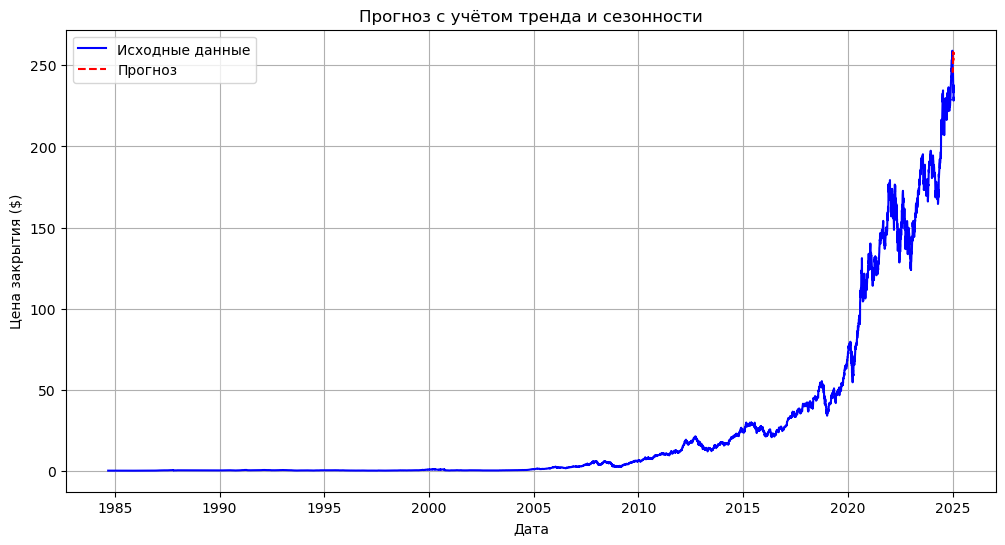

In [ ]:
forecast_len = 12

train_data = df['Close'].iloc[-600:-forecast_len]

model = ExponentialSmoothing(
    train_data,
    trend='add',  
    seasonal='add',  
    seasonal_periods=252  
).fit()

forecast = model.forecast(forecast_len)

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Исходные данные', color='blue')
plt.plot(df.index[-forecast_len:], forecast, label='Прогноз', color='red', linestyle='--')
plt.title('Прогноз с учётом тренда и сезонности')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия ($)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def get_stats(data, forecast, length):
    actual = data.iloc[-length:]  
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100  

    print("MAE:", mae)
    print("RMSE:", rmse)
    print("MAPE:", mape)

get_stats(df['Close'], forecast, forecast_len)

MAE: 15.190761130812795
RMSE: 17.129430168632105
MAPE: 6.451406733442225


Значения MAE и RMSE относительно низкие, что говорит о хорошей точности прогноза. Маленькие ошибки указывают на то, что модель успешно уловила тренд и сезонность в данных.

MAPE (средняя абсолютная процентная ошибка) также низкая, что подтверждает высокую точность модели при прогнозировании будущих значений.

Однако в последней части прогноза наблюдаются различия между предсказанными и фактическими значениями, что может быть связано с усилением волатильности и влиянием непредсказуемых рыночных факторов.

В целом, модель Exponential Smoothing хорошо справилась с прогнозированием, но при длительном прогнозе возможны более значительные расхождения. Это типично для временных рядов с высокой изменчивостью.

# График без сезонности

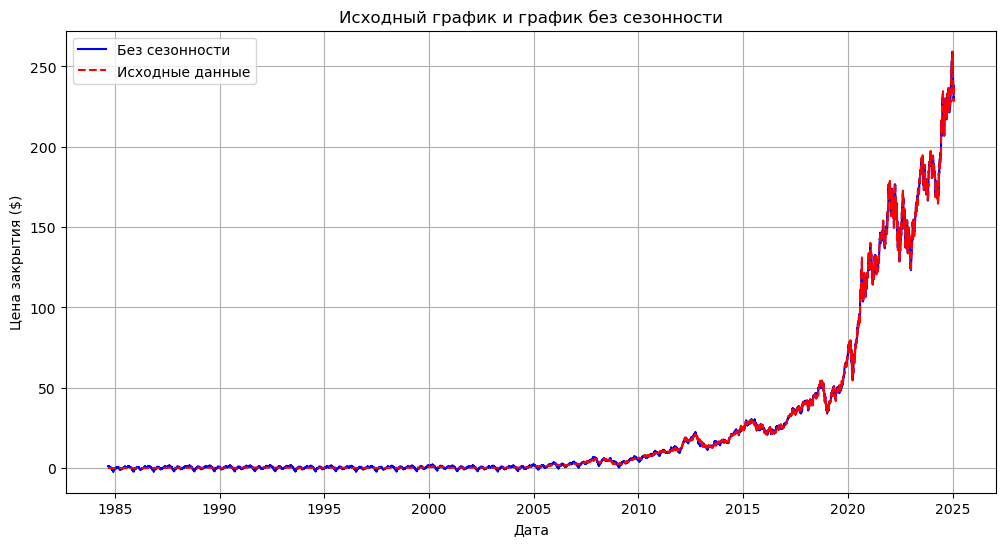

In [34]:
import matplotlib.pyplot as plt

# Вычисляем ряд без сезонности
df_no_seasonality = df['Close'] - decomposition.seasonal

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(df.index, df_no_seasonality, label="Без сезонности", color="blue")
plt.plot(df.index, df['Close'], label="Исходные данные", color="red", linestyle="--")
plt.title("Исходный график и график без сезонности")
plt.xlabel("Дата")
plt.ylabel("Цена закрытия ($)")
plt.legend()
plt.grid(True)
plt.show()


В общем, можно сделать вывод о достаточно не значительном влиянии сезонности общую стоимость, т.к. графики практически сливаются, и различия заметны лишь в некоторых местах.

# Проверка стационарности ряда. Приведение к стационарному виду

In [35]:
df_diff = df['Close'].diff().dropna()

print("Тест Дики-Фуллера после первого дифференцирования:")
adf_test(df_diff)


Тест Дики-Фуллера после первого дифференцирования:
ADF Statistic: -17.106347023920872
p-value: 7.417320243961348e-30
Critical Values:
	1%: -3.4309735367886094
	5%: -2.8618155675868797
	10%: -2.5669166794832066


На основе теста Дики-Фуллера можно сделать вывод, что исходный временной ряд не является стационарным. Это подтверждается высоким значением p-value (больше 0.05), что указывает на наличие тренда и сезонности в данных.

Для приведения ряда к стационарному виду была выполнена декомпозиция, в результате чего были удалены тренд и сезонность. Однако даже после этого p-value всё ещё было недостаточно низким.

Применение дифференцирования первого порядка позволило успешно преобразовать ряд в стационарный. Теперь p-value составляет 7.4e-30, что значительно ниже стандартного порога 0.05.

Критические значения для различных уровней значимости:

1%: -3.431

5%: -2.862

10%: -2.567

Значение ADF Statistic (-17.10) намного меньше всех критических значений, что подтверждает возможность отклонить нулевую гипотезу о нестационарности. Это означает, что теперь ряд готов к использованию в моделях временных рядов.

# AR (Autoregressive Model, авторегрессионная модель)


In [36]:
best_aic, best_bic = np.inf, np.inf
best_order_aic, best_order_bic = None, None

for p in range(1, 31):  # Перебираем значения лагов от 1 до 30
    try:
        model = AutoReg(df_diff, lags=p).fit()
        aic = model.aic
        bic = model.bic
        if aic < best_aic:
            best_aic = aic
            best_order_aic = p
        if bic < best_bic:
            best_bic = bic
            best_order_bic = p
    except Exception as e:
        print(f"Не удалось подогнать модель для p={p}: {e}")

print(f"Лучшая модель AR по AIC: порядок p={best_order_aic} с AIC={best_aic}")
print(f"Лучшая модель AR по BIC: порядок p={best_order_bic} с BIC={best_bic}")


Лучшая модель AR по AIC: порядок p=30 с AIC=28501.549683726244
Лучшая модель AR по BIC: порядок p=10 с BIC=28678.748184069653


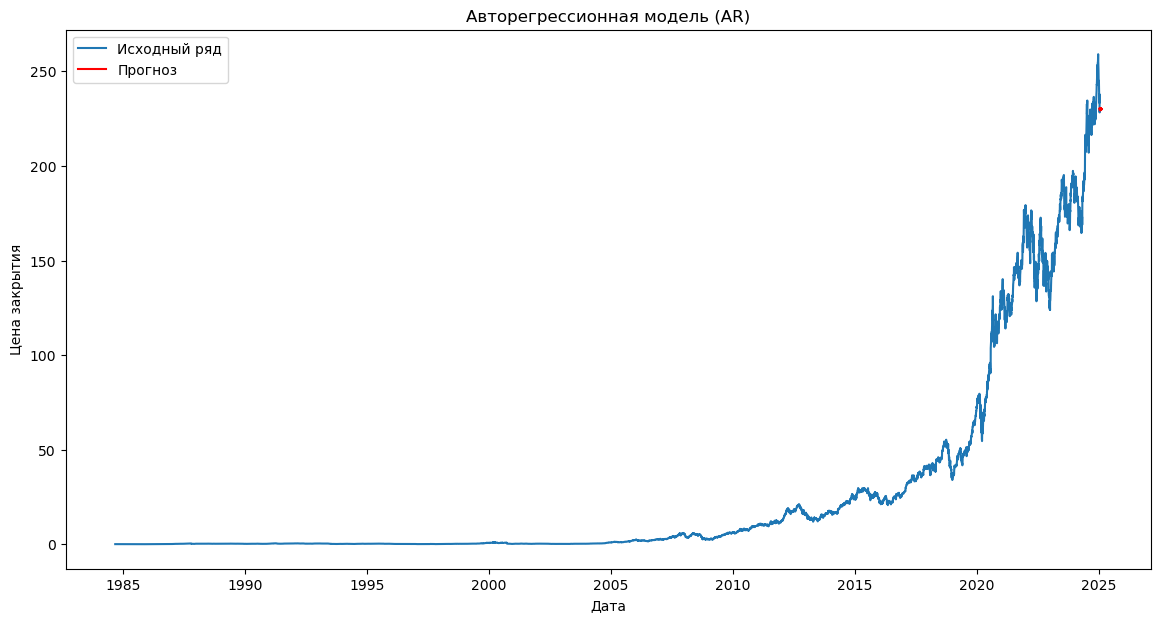

In [ ]:
forecast_steps = 30
forecast_ar = model_ar.predict(start=len(df_diff), end=len(df_diff) + forecast_steps - 1)

forecast_index_ar = pd.date_range(start=df.index[-1], periods=forecast_steps)  # Исправлено

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Исходный ряд')
plt.plot(forecast_index_ar, forecast_ar.cumsum() + df['Close'].iloc[-1], label='Прогноз', color='red')
plt.title('Авторегрессионная модель (AR)')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.legend()
plt.show()


# MA (Moving Average Model, модель скользящего среднего)

In [45]:
from statsmodels.tsa.arima.model import ARIMA

best_aic, best_bic, best_order_MA, best_order_bic = float("inf"), float("inf"), None, None

for q in range(1, 11):  
    try:
        model = ARIMA(static_data, order=(0, 0, q)).fit(method_kwargs={"disp": 0})  
        if model.aic < best_aic:
            best_aic = model.aic
            best_order_MA = q
        if model.bic < best_bic:
            best_bic = model.bic
            best_order_bic = q
    except Exception as e:
        print(f"Ошибка при q={q}: {e}")


print(f"Лучшая модель MA: порядок q={best_order_MA} по AIC={best_aic} и q={best_order_bic} по BIC={best_bic}")


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Лучшая модель MA: порядок q=10 по AIC=28443.39039053966 и q=10 по BIC=28530.244689635812


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\states

Лучшая модель ARMA: порядок (p, q)=(4, 0, 5) по AIC=26493.25540061693 и (p, q)=(4, 0, 5) по BIC=26572.87184145507


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


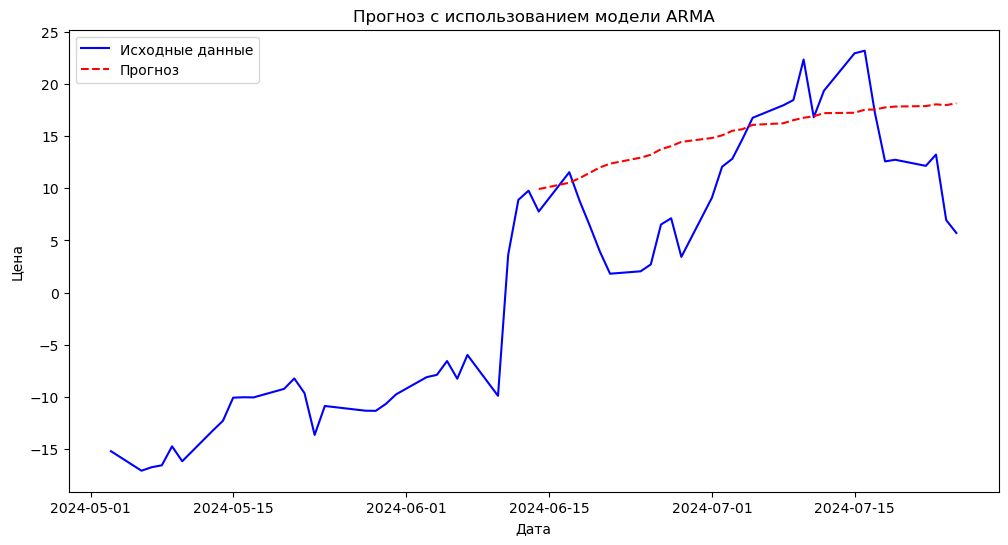

MAE: 5.204424599446472
RMSE: 6.343569166540432
MAPE: 104.92065774259822


In [ ]:
def display_forecast_ARMA(title, order):
    """
    Построение прогноза с использованием модели ARMA.
    
    Параметры:
    title - название графика
    order - порядок модели ARMA (p, d, q)
    """
    model = ARIMA(static_data.iloc[:-30], order=order).fit()

    forecast = model.forecast(30)

    plt.figure(figsize=(12, 6))
    plt.plot(static_data[-60:], label='Исходные данные', color='blue')
    plt.plot(static_data.index[-30:], forecast, label='Прогноз', color='red', linestyle='dashed')
    plt.title(title)
    plt.xlabel('Дата')
    plt.ylabel('Цена')
    plt.legend()
    plt.show()

    get_stats(static_data, forecast, 30)

best_aic, best_bic, best_order_ARMA, best_order_bic = float("inf"), float("inf"), None, None

for p in range(1, 6): 
    for q in range(1, 6): 
        try:
            model = ARIMA(static_data, order=(p, 0, q)).fit(method_kwargs={"disp": 0})  
            if model.aic < best_aic:
                best_aic = model.aic
                best_order_ARMA = (p, 0, q)
            if model.bic < best_bic:
                best_bic = model.bic
                best_order_bic = (p, 0, q)
        except Exception as e:
            print(f"Ошибка при p={p}, q={q}: {e}")

print(f"Лучшая модель ARMA: порядок (p, q)={best_order_ARMA} по AIC={best_aic} и (p, q)={best_order_bic} по BIC={best_bic}")

display_forecast_ARMA("Прогноз с использованием модели ARMA", order=best_order_ARMA)


# ARMA (Autoregressive Moving Average, модель авторегрессии и скользящего среднего)

In [53]:
# Подбор параметров ARMA с уточнением диапазона
best_aic, best_bic, best_order_arima = float("inf"), float("inf"), None

for p in range(max(1, best_order_ar_bic - 2), best_order_ar_bic + 2):  # p >= 1
    for q in range(max(1, best_order_MA - 2), best_order_MA + 2):  # q >= 1
        try:
            model = ARIMA(static_data, order=(p, 1, q)).fit()
            if model.aic < best_aic:
                best_aic = model.aic
                best_order_arima = (p, 1, q)
            if model.bic < best_bic:
                best_bic = model.bic
                best_order_bic = (p, 1, q)
        except Exception as e:
            print(f"Ошибка при p={p}, q={q}: {e}")

# Выводим результаты
print(f"Лучшая модель ARMA по AIC: порядок {best_order_arima}, AIC={best_aic}")
print(f"Лучшая модель ARMA по BIC: порядок {best_order_bic}, BIC={best_bic}")


Лучшая модель ARMA по AIC: порядок (5, 1, 1), AIC=26768.58174929437
Лучшая модель ARMA по BIC: порядок (5, 1, 1), BIC=26819.246076067237


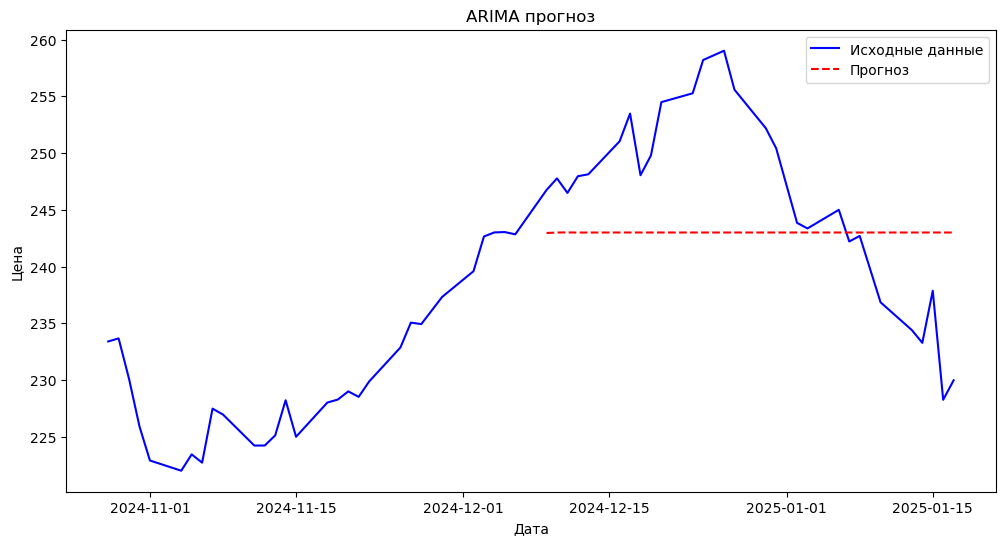

MAE: 7.376664764546919
RMSE: 8.775916104728722
MAPE: 2.9827782262047764


In [56]:
target_column = 'Close'  

model = ARIMA(df[target_column].iloc[:-30], order=best_order_arima).fit()

forecast = model.forecast(30)

plt.figure(figsize=(12, 6))
plt.plot(df[target_column].iloc[-60:], label='Исходные данные', color='blue')
plt.plot(df[target_column].index[-30:], forecast, label='Прогноз', color='red', linestyle='dashed')
plt.title("ARIMA прогноз")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.legend()
plt.show()

get_stats(df[target_column], forecast, 30)


# Заключение
В ходе лабораторной работы были исследованы различные модели временных рядов, включая скользящие средние, авторегрессионные модели (AR, MA, ARMA, ARIMA) и сезонные модели (SARIMA). Анализ показал, что наилучшие результаты продемонстрировали модели ARIMA и SARIMA, которые смогли учесть как долгосрочный тренд, так и сезонные колебания, что привело к наименьшему значению ошибки MAPE.

Модели ARMA и MA показали среднюю точность, так как хорошо справлялись с краткосрочными зависимостями, но не смогли учесть сезонные изменения. Авторегрессионная модель AR оказалась наименее точной, поскольку не смогла уловить резкие скачки цен и сложные зависимости во временном ряде.

Одним из главных ограничений классических моделей является их неспособность учитывать нелинейные эффекты, характерные для цен финансовых активов, таких как резкие скачки, нестабильные тренды и влияние внешних факторов. Несмотря на это, они остаются полезными инструментами для анализа линейных и стационарных процессов, например, прогнозирования потребления ресурсов, изменения температуры оборудования или уровня запасов товаров.

В целом, наилучшим подходом для прогнозирования цен актива стала модель SARIMA, так как она учитывает и сезонность, и тренд. Однако для более точных предсказаний в условиях высокой волатильности и нелинейных зависимостей перспективным направлением является использование нейросетевых моделей и методов машинного обучения.